# 신경망
## 구조: 입력층, 출력층, 은닉층


## 퍼셉트론
$$y = \left\{\begin{matrix} 0(b + w_{1}x_{1}+w_{2}x_{2}\leq\theta) \\ 1(b + w_{1}x_{1}+w_{2}x_{2}>\theta)\end{matrix}\right.$$

- b: 편향을 나타내는 매개변수, 뉴런이 얼마나 쉽게 활성화되는지
- $w_{1}, w_{2}$: 신호의 가중치, 신호의 영향력 제어

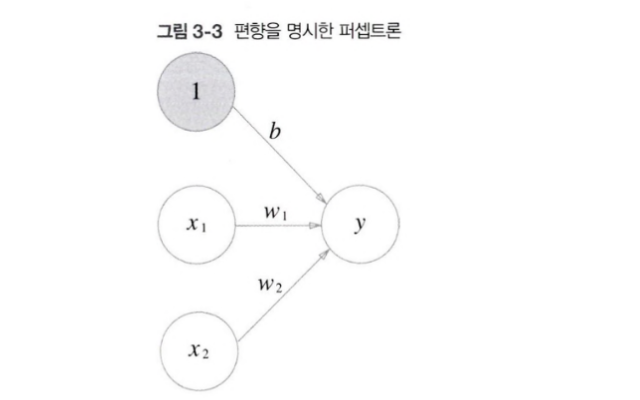

## 활성화 함수
- 활성화함수: 입력 신호의 총합을 출력 신호로 변환하는 함수
- 입력 신호의 총합이 활성화를 일으키는지 정함
$$ y = h(b+w_{1}x_{1}+w_{2}x_{2})$$
$$h(x) = \left\{\begin{matrix} 0(x \leq 0) \\ 1(x>0)\end{matrix}\right.$$

위 식은 가중치가 곱해진 입력 신호의 총합을 계산하고 그 합을 활성화 함수에 입력해 결과를 냄 -> 아래 식으로 표현 가능

$$a = b + w_{1}x_{1}+w_{2}x_{2}$$
$$y = h(a)$$

- a: 가중치가 달린 입력 신호와 편향의 총합
- y: h()를 통해 변환된 노드   
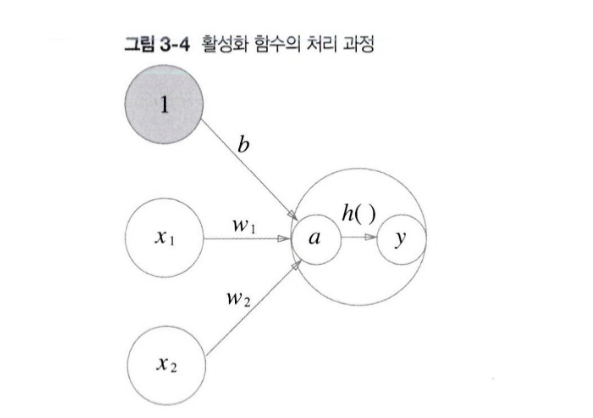

### 계단 함수인 활성화 함수
$$h(x) = \left\{\begin{matrix} 0(x \leq 0) \\ 1(x>0)\end{matrix}\right.$$
- 위와 같은 식은 임계값을 경계로 출력이 바뀌는데, 이러한 것을 계단 함수라고 한다.
- 퍼셉트론은 활성화함수로 계단 함수를 쓰고 있는 것으로 볼 수 있다.
- 활성화함수를 다른 함수로 변경하면 퍼셉트론 이상의 알고리즘을 만들 수 있을 것이다.

In [1]:
# 간단한 계단 함수
# x에 실수만 가능
def step_function(x):
    if x > 0:
        return 1
    else: 
        return 0

In [2]:
# 넘파이 배열 지원
import numpy as np
def step_function(x):
    y = x > 0
    return y.astype(np.int)
# 넘파이 배열에 부등호 연산 수행->원소 각각에 부등호 연산을 수행한 bool배열 생성

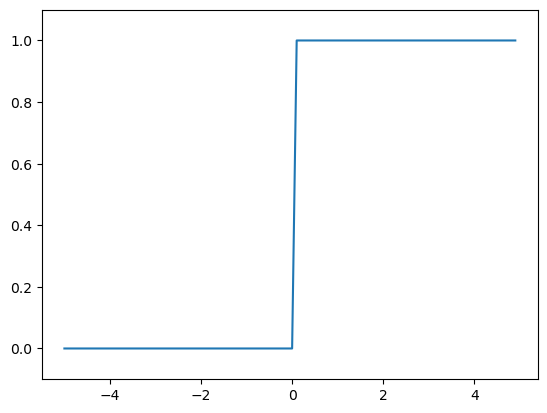

In [5]:
# 계단 함수의 그래프
import numpy as np
import matplotlib.pylab as plt
def step_function(x):
    return np.array(x > 0, dtype=int)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 계단 함수가 아닌 활성화 함수


#### 시그모이드 함수
$$h(x) = \frac{1}{1+exp(-x)}$$
- 신경망에서 자주 사용하는 활성화함수


In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

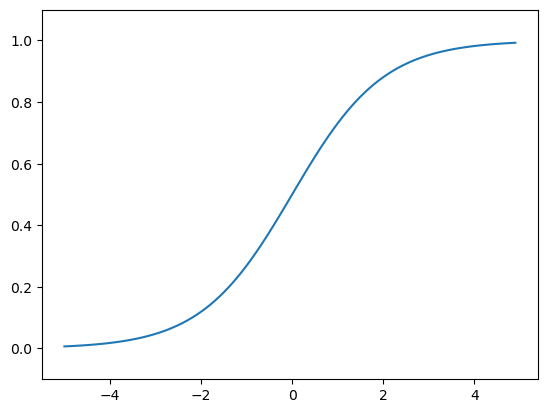

In [8]:
# 시그모이드 함수의 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드 vs 계단 함수

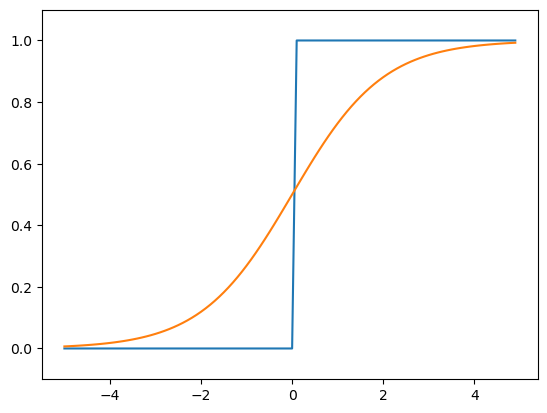

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
z = sigmoid(x)
plt.plot(x,y)
plt.plot(x,z)
plt.ylim(-0.1, 1.1)
plt.show()

- 차이점: 매끄러움
    - 매끄러움의 의미: 입력에 따라 출력이 연속적으로 변화함
    - 이진적이지 않은 출력값
- 공통점: 입력이 작을 때 0, 클 때 1에 가까워지는 모양

### 비선형 함수
- 시그모이드와 계단 함수는 모두 비선형 함수이다.
- 이뿐만 아니라 신경망에서 층을 쌓는 의미가 있으려면 비선형 함수여야 한다.
- 신경망에서는 선형 함수를 사용해서는 안됨
    - 선형 함수->신경망의 층을 깊게 하는 의미가 없음
    - 층을 깊게 해도 은닉층 없이 구현하는 것과 질적으로 다르지 않다.
$$ h(x) = cx$$
$$y(x) = h(h(x)) = c^{2}x$$

### ReLU 함수
-  최근에 주로 이용되는 또 다른 비선형 함수
$$ h(x) = \left\{\begin{matrix} x(x > 0) \\ 0(x \leq 0) \end{matrix}\right.$$

In [13]:
# ReLU 구현
def relu(x):
    return np.maximum(0, x) # maximum: 두 입력값 중 큰 값을 반환

## 다차원 배열의 계산
### 다차원 배열

In [16]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A)) # 배열의 차원 수
print(A.shape) # 배열의 형상
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [18]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)
print(B.shape[0], B.shape[1])

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
3 2


In [21]:
### 행렬의 곱
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
print(np.dot(A, B))

[[19 22]
 [43 50]]
